<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>


</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from scipy import stats as st 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?

La información de los datos y sus tipos son correctos, sin embargo la información inicial ofrece los valores en GB pero debo observar que operaciones se van a realizar para definir si es posible cambiar de mg a Gb. Adicional la columna ' usd_monthly_pay' para mayor claridad es llamada 'usd_monthly_fee' como se describe inicialente. y la columna 'plan_name' deberia ser la primera y los siguientes datos corresponden a la descripción de cada plan. Por ultimo agregaria la palabra 'extra' para los valores ofrecidos por minuto,mensaje y/o gb extra.


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans= plans.rename(columns={'usd_monthly_pay':'usd_monthly_fee'})
change = ['plan_name'] + [col for col in plans.columns if col != 'plan_name']
plans = plans[change]
print(plans)


  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1  ultimate               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute  
0               20          10             0.03            0.03  
1               70           7             0.01            0.01  


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
plans= plans.rename(columns={'usd_per_gb':'usd_per_gb_extra','usd_per_message':'usd_per_message_extra','usd_per_minute':'usd_per_minute_extra'})
print(plans)

  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1  ultimate               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb_extra  usd_per_message_extra  \
0               20                10                   0.03   
1               70                 7                   0.01   

   usd_per_minute_extra  
0                  0.03  
1                  0.01  


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

A nivel general se podrian cambiar algunos formatos, como el de user_id que para mi sería mas correcto que fuera un tipo objeto y de esa forma no se pudiera modificar, las fechas tener su tipo de dato de fechas y por último la columna 'churn_date' contiene datos ausentes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users['user_id']=users['user_id'].astype('str')
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print(users.dtypes)


user_id               object
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date            object
dtype: object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
users=users.rename(columns={'age':'user_age','plan':'plan_name'})
users=users.fillna('Active')
print(users.sample(10))
print(users.isna().sum())
print('Duplicados:',users.duplicated().sum())

    user_id first_name last_name  user_age  \
100    1100      Aaron      Rowe        65   
465    1465    Arianna  Morrison        73   
207    1207     Samuel    Porter        63   
402    1402      Jesus     Berry        25   
24     1024       Yuki     Tyson        74   
185    1185      Loria   Freeman        47   
4      1004    Leonila  Thompson        40   
281    1281       Zack     Hardy        39   
86     1086      Adena    Macias        36   
199    1199  Antonetta    Finley        39   

                                          city   reg_date plan_name  \
100  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-02-13      surf   
465                         Pittsburgh, PA MSA 2018-06-22  ultimate   
207            Omaha-Council Bluffs, NE-IA MSA 2018-12-22      surf   
402  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-06-11      surf   
24   New York-Newark-Jersey City, NY-NJ-PA MSA 2018-08-21      surf   
185     Louisville/Jefferson County, KY-IN MSA 2018-01-14  ultimate

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
calls.sample(10)


,id,user_id,call_date,duration
27851,1106_121,1106,2018-05-22,13.95
44757,1161_369,1161,2018-12-20,6.24
108581,1383_218,1383,2018-11-01,1.82
117037,1408_686,1408,2018-10-01,3.10
85025,1313_5,1313,2018-09-01,7.78
19233,1073_39,1073,2018-09-22,0.00
82196,1296_88,1296,2018-12-03,0.00
86454,1320_123,1320,2018-05-30,3.53
49998,1181_264,1181,2018-11-28,1.26
127482,1456_391,1456,2018-07-23,2.84


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
El dataFrame calls contiene cuatro columnas, sin valores ausentes, una columna de user_id tipo entero, para el cual sería mas apropiado el tipo string, y una columna call_date que puede tener formato fecha.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
calls['user_id']=calls['user_id'].astype('str')
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(calls.dtypes)
print('Duplicados:',calls.duplicated().sum())

id                   object
user_id              object
call_date    datetime64[ns]
duration            float64
dtype: object
Duplicados: 0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
calls=calls.rename(columns={'duration':'duration_call', 'id':'call_id'})
print(calls.head())

    call_id user_id  call_date  duration_call
0   1000_93    1000 2018-12-27           8.52
1  1000_145    1000 2018-12-27          13.66
2  1000_247    1000 2018-12-27          14.48
3  1000_309    1000 2018-12-28           5.76
4  1000_380    1000 2018-12-30           4.22


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
messages.sample(10)


,id,user_id,message_date
53084,1339_218,1339,2018-11-27
31384,1195_251,1195,2018-12-20
27598,1172_55,1172,2018-11-19
30307,1191_12,1191,2018-12-09
1783,1017_135,1017,2018-11-24
45120,1303_39,1303,2018-12-30
40744,1261_406,1261,2018-03-29
41013,1264_64,1264,2018-07-16
56614,1357_320,1357,2018-07-09
25509,1154_92,1154,2018-11-19


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
El dataFrame 'messages' contiene 3 columnas sin datos nulos, la segunda y tercera columna deberin cambiarse a formato object y datatime respectivamente. Para mayor claridad el id debe llamrse como id_messages.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
messages['user_id']=messages['user_id'].astype('str')
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(messages.dtypes)

id                      object
user_id                 object
message_date    datetime64[ns]
dtype: object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
messages=messages.rename(columns={'id':'message_id'})
print(messages.columns)
print('Duplicados:',messages.duplicated().sum())

Index(['message_id', 'user_id', 'message_date'], dtype='object')
Duplicados: 0


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet

internet.sample(10)

,id,user_id,session_date,mb_used
45946,1203_271,1203,2018-09-04,0.00
88746,1408_465,1408,2018-05-14,338.64
56917,1257_184,1257,2018-06-26,902.70
59176,1266_161,1266,2018-12-25,354.03
54814,1248_30,1248,2018-12-27,0.00
92362,1431_49,1431,2018-11-30,87.71
39151,1175_424,1175,2018-11-09,133.32
12304,1060_13,1060,2018-12-03,179.06
29993,1138_224,1138,2018-05-22,737.72
32360,1146_379,1146,2018-11-05,345.15


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
internet['user_id']= internet['user_id'].astype('str')
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(internet.dtypes)

id                      object
user_id                 object
session_date    datetime64[ns]
mb_used                float64
dtype: object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
internet= internet.rename(columns={'id':'session_id'})
print(internet.columns)

Index(['session_id', 'user_id', 'session_date', 'mb_used'], dtype='object')


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1  ultimate               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb_extra  usd_per_message_extra  \
0               20                10                   0.03   
1               70                 7                   0.01   

   usd_per_minute_extra  
0                  0.03  
1                  0.01  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month']= calls['call_date'].dt.month
calls_quantity_per_month=calls.groupby(['user_id','month']).size().reset_index(name="calls_quantity_per_month")
print(calls_quantity_per_month.head(10))


  user_id  month  calls_quantity_per_month
0    1000     12                        16
1    1001      8                        27
2    1001      9                        49
3    1001     10                        65
4    1001     11                        64
5    1001     12                        56
6    1002     10                        11
7    1002     11                        55
8    1002     12                        47
9    1003     12                       149


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
total_calls=calls.groupby(['user_id','month'])['duration_call'].sum().reset_index()
print(total_calls)

     user_id  month  duration_call
0       1000     12         116.83
1       1001      8         171.14
2       1001      9         297.69
3       1001     10         374.11
4       1001     11         404.59
...      ...    ...            ...
2253    1498     12         324.77
2254    1499      9         330.37
2255    1499     10         363.28
2256    1499     11         288.56
2257    1499     12         468.10

[2258 rows x 3 columns]


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month']= messages['message_date'].dt.month
total_messages=messages.groupby(['user_id','month']).size().reset_index(name='messages_per_month')
print(total_messages)

     user_id  month  messages_per_month
0       1000     12                  11
1       1001      8                  30
2       1001      9                  44
3       1001     10                  53
4       1001     11                  36
...      ...    ...                 ...
1801    1496      9                  21
1802    1496     10                  18
1803    1496     11                  13
1804    1496     12                  11
1805    1497     12                  50

[1806 rows x 3 columns]


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet['month']= internet['session_date'].dt.month
total_internet= internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='mb_used_per_month')
total_internet

,user_id,month,mb_used_per_month
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
fusion= total_internet.merge(total_messages, on=['user_id','month'], how='outer')
total_fusion= fusion.merge(total_calls, on=['user_id','month'], how='outer')
total_fusion.fillna(0, inplace=True)
print(total_fusion)

     user_id  month  mb_used_per_month  messages_per_month  duration_call
0       1000     12            1901.47                11.0         116.83
1       1001      8            6919.15                30.0         171.14
2       1001      9           13314.82                44.0         297.69
3       1001     10           22330.49                53.0         374.11
4       1001     11           18504.30                36.0         404.59
...      ...    ...                ...                 ...            ...
2288    1470     12               0.00               153.0         560.44
2289    1482     10               0.00                 2.0           0.00
2290    1484     11               0.00                 1.0          37.50
2291    1491      4               0.00                 6.0          40.45
2292    1044      8               0.00                 0.0          12.45

[2293 rows x 5 columns]


In [29]:
# Añade la información de la tarifa
plan_information= users[['user_id','plan_name','city']].merge(plans,on='plan_name', how='inner')
final_fusion= total_fusion.merge(plan_information, on='user_id', how='left')
final_fusion.head(10)
final_fusion.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   month                  2293 non-null   int64  
 2   mb_used_per_month      2293 non-null   float64
 3   messages_per_month     2293 non-null   float64
 4   duration_call          2293 non-null   float64
 5   plan_name              2293 non-null   object 
 6   city                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   mb_per_month_included  2293 non-null   int64  
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_fee        2293 non-null   int64  
 11  usd_per_gb_extra       2293 non-null   int64  
 12  usd_per_message_extra  2293 non-null   float64
 13  usd_per_minute_extra   2293 non-null   float64
dtypes: float64(5), int64(6), object(3)
memory usage: 268.7+ 

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
final_fusion['minutes_extra']= final_fusion['duration_call']-final_fusion['minutes_included']
final_fusion['messages_extra']= final_fusion['messages_per_month']-final_fusion['messages_included']
internet_extra= final_fusion['mb_used_per_month']-final_fusion['mb_per_month_included']
final_fusion['gb_internet_extra']= (internet_extra/1024).apply(lambda x: max(0, np.ceil(x)))

final_fusion[['minutes_extra','messages_extra','gb_internet_extra']]=final_fusion[['minutes_extra','messages_extra','gb_internet_extra']].clip(lower=0)
final_fusion['extra_fee']=(final_fusion['minutes_extra']*final_fusion['usd_per_minute_extra']+ 
                           final_fusion['messages_extra']*final_fusion['usd_per_message_extra']+
                           final_fusion['gb_internet_extra']*final_fusion['usd_per_gb_extra'])
final_fusion['pay_month']=(final_fusion['extra_fee']+final_fusion['usd_monthly_fee'])

print(final_fusion[['user_id','month','plan_name','pay_month']].head(10))

  user_id  month plan_name  pay_month
0    1000     12  ultimate      70.00
1    1001      8      surf      20.00
2    1001      9      surf      20.00
3    1001     10      surf      90.09
4    1001     11      surf      60.00
5    1001     12      surf      60.00
6    1002     10      surf      20.00
7    1002     11      surf      60.00
8    1002     12      surf      20.00
9    1003     12      surf     156.23


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

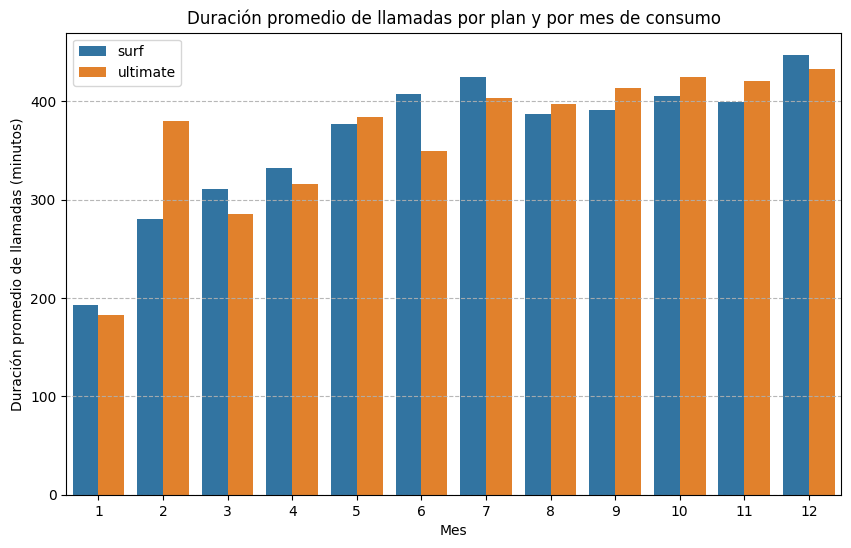

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = final_fusion.groupby(['plan_name', 'month'])['duration_call'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='duration_call', hue='plan_name', data=avg_call_duration)

plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.title('Duración promedio de llamadas por plan y por mes de consumo')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes
</div>


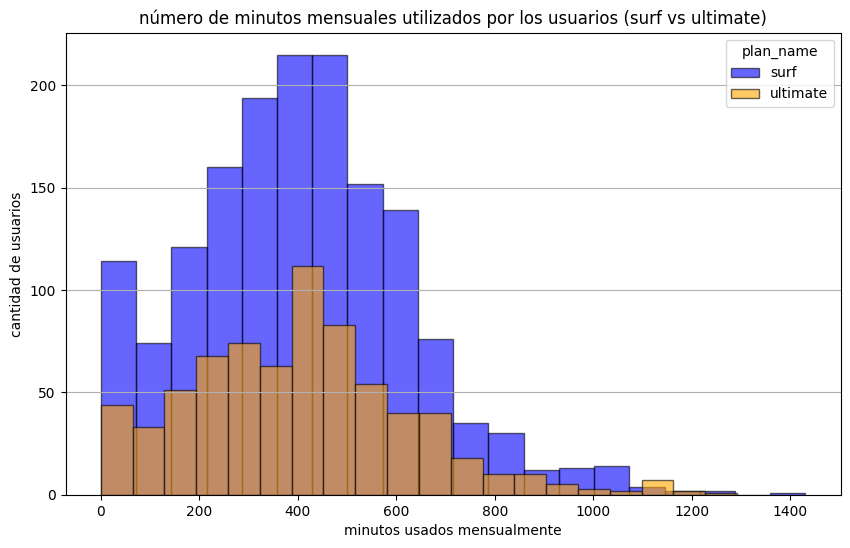

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
monthly_minutes= final_fusion.groupby(['user_id','plan_name','month'])['duration_call'].sum().reset_index()
surf_minutes= monthly_minutes[monthly_minutes['plan_name']=='surf']['duration_call']
ultimate_minutes=monthly_minutes[monthly_minutes['plan_name']=='ultimate']['duration_call']
plt.figure(figsize=(10,6))
plt.hist(surf_minutes, bins=20, alpha=0.6,label='surf', color='blue', edgecolor= 'black')
plt.hist(ultimate_minutes, bins=20, alpha=0.6,label='ultimate', color='orange', edgecolor= 'black')

plt.xlabel('minutos usados mensualmente')
plt.ylabel('cantidad de usuarios')
plt.title('número de minutos mensuales utilizados por los usuarios (surf vs ultimate)')
plt.legend(title='plan_name')
plt.grid(axis='y')
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media = monthly_minutes['duration_call'].mean()
varianza = monthly_minutes['duration_call'].var()
desviacion_estandar= np.std(monthly_minutes['duration_call'])
print(f'La media es: {media:.2f} minutos')
print(f'la varianza es: {varianza:.2f} minutos')
print(f'la desviacion estandar es: {desviacion_estandar:.2f} minutos')
print()
print('Media para clientes Surf:',surf_minutes.mean())
print('Desviación estandar para clientes Surf:',np.std(surf_minutes))
print('Media para clientes ultimate:',ultimate_minutes.mean())
print('Desviación estandar para clientes ultimate:',np.std(ultimate_minutes))


La media es: 405.21 minutos
la varianza es: 49900.20 minutos
la desviacion estandar es: 223.33 minutos

Media para clientes Surf: 404.76239033693577
Desviación estandar para clientes Surf: 221.59392666148682
Media para clientes ultimate: 406.1930833333333
Desviación estandar para clientes ultimate: 227.08863430557423


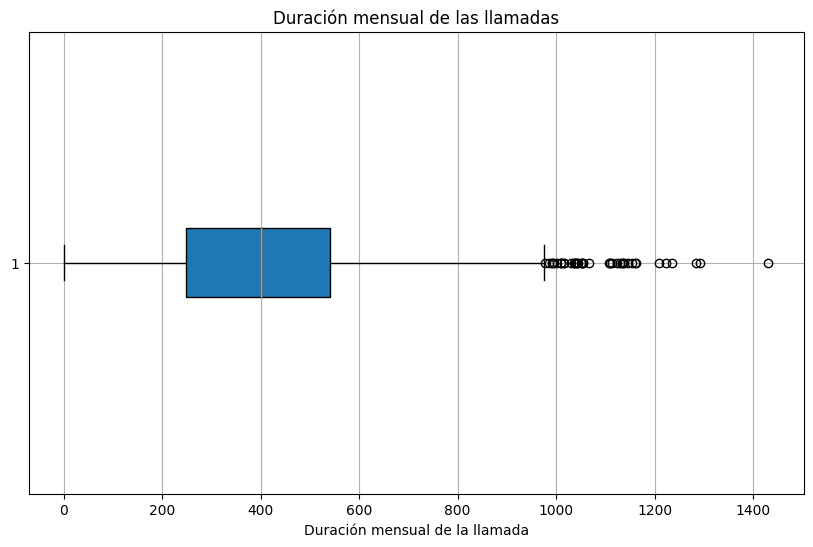

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
monthly_duration= final_fusion.groupby(['user_id','month'])['duration_call'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.boxplot(monthly_duration['duration_call'], vert=False, patch_artist=True)
plt.xlabel('Duración mensual de la llamada')
plt.title('Duración mensual de las llamadas')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El objetivo de estos ejercicios es el de comparar las diferencias entre los planes existentes, por lo que lo ideal es hacer un diagrama de caja por cada uno de los planes para poder comparar las distribuciones de cada uno de los planes
</div>


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

En conclusión, los usuarios de Megaline consumen 405 minutos en promedio, sin importartar el plan que tengan, el 65% de los usuarios gasta entre 629 y 182 minutos, El mes con menor consumo es enero, donde los clientes consumen menos de 200 minutos. Febrero es el unico mes en  el que varian significantemente las tendencias de consumo por tal motivo los usuarios de ultimate consumen menos de 400 minutos mientras que los de surf consumen un poco menos de 300 minutos, pero en general los clientes de surf consumen un poco mas de minutos. Sin embargo, 500 minutos son un número perfecto de minutos para los dos planes.

### Mensajes

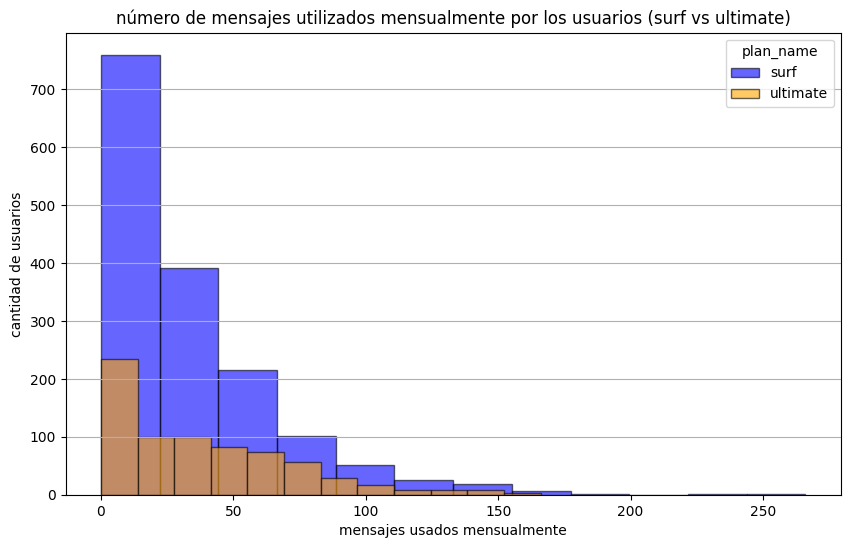

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
monthly_messages= final_fusion.groupby(['user_id','plan_name','month'])['messages_per_month'].sum().reset_index()
surf_messages= monthly_messages[monthly_messages['plan_name']=='surf']['messages_per_month']
ultimate_messages=monthly_messages[monthly_messages['plan_name']=='ultimate']['messages_per_month']
plt.figure(figsize=(10,6))
plt.hist(surf_messages, bins=12, alpha=0.6,label='surf', color='blue', edgecolor= 'black')
plt.hist(ultimate_messages, bins=12, alpha=0.6,label='ultimate', color='orange', edgecolor= 'black')

plt.xlabel('mensajes usados mensualmente')
plt.ylabel('cantidad de usuarios')
plt.title('número de mensajes utilizados mensualmente por los usuarios (surf vs ultimate)')
plt.legend(title='plan_name')
plt.grid(axis='y')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Los usuarios sin importar su plan, no usan muchos mensajes, en general  consumen menos de 200 mensajes. Los datos se concentran en un rango de 0 a 60 mensajes.


In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan


<function matplotlib.pyplot.show(close=None, block=None)>

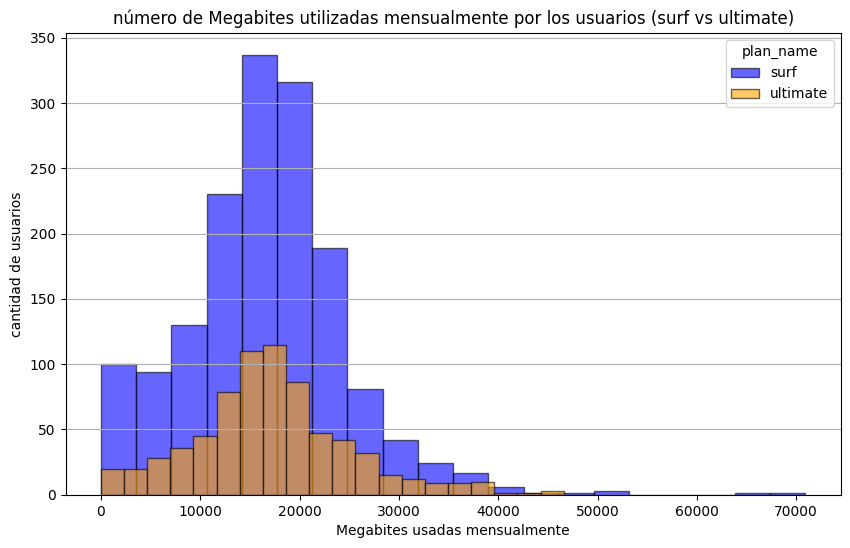

In [38]:
monthly_internet= final_fusion.groupby(['user_id','plan_name','month'])['mb_used_per_month'].sum().reset_index()
surf_internet= monthly_internet[monthly_internet['plan_name']=='surf']['mb_used_per_month']
ultimate_internet=monthly_internet[monthly_internet['plan_name']=='ultimate']['mb_used_per_month']
plt.figure(figsize=(10,6))
plt.hist(surf_internet, bins=20, alpha=0.6,label='surf', color='blue', edgecolor= 'black')
plt.hist(ultimate_internet, bins=20, alpha=0.6,label='ultimate', color='orange', edgecolor= 'black')

plt.xlabel('Megabites usadas mensualmente')
plt.ylabel('cantidad de usuarios')
plt.title('número de Megabites utilizadas mensualmente por los usuarios (surf vs ultimate)')
plt.legend(title='plan_name')
plt.grid(axis='y')
plt.show

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Buena manera de mostrar las diferencias, pero debemos tener un orden para mostrar las cosas, en el caso de la segunda grafica, esta pertenece a la sección de `internet` no a la de `mensajes`
</div>


### Internet

In [39]:
print('Internet en Gb:') 
print('media de consumo de surf:') 
print(surf_internet.mean()/1024)
print('Desviación estándar de surf:') 
print((np.std(surf_internet))/1024)
print('media de consumo de ultimate:') 
print(ultimate_internet.mean()/1024)
print('Desviación estándar de ultimate:') 
print((np.std(ultimate_internet))/1024)
print()
print('Internet en MG:')
print('media de consumo de surf:') 
print(surf_internet.mean())
print('Desviación estándar de surf:') 
print(np.std(surf_internet))
print('media de consumo de ultimate:') 
print(ultimate_internet.mean())
print('Desviación estándar de ultimate:') 
print(np.std(ultimate_internet))
print()

Internet en Gb:
media de consumo de surf:
16.170198720845914
Desviación estándar de surf:
7.823208705817454
media de consumo de ultimate:
16.811230170355902
Desviación estándar de ultimate:
7.6625418295464565

Internet en MG:
media de consumo de surf:
16558.283490146216
Desviación estándar de surf:
8010.965714757073
media de consumo de ultimate:
17214.699694444444
Desviación estándar de ultimate:
7846.442833455571



In [40]:
print('Media:')
print(monthly_internet['mb_used_per_month'].mean()/1024)

Media:
16.37148203687173


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

En conclusión, las tendencias de consumo de internet no varia de manera representativa de un plan a otro, en promedio consumen 16.37 GB y sus valores s disribuyen de manera normal con una concentración mayor entre 8 y 24 GB.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [41]:
print('media:',final_fusion['pay_month'].mean())
print('Desviación estandar:',np.std(final_fusion['pay_month']))


media: 64.09111016136066
Desviación estandar: 46.533305640921945


In [42]:
monthly_fee= final_fusion.groupby(['user_id','plan_name','month'])['pay_month'].sum().reset_index()
surf= monthly_fee[monthly_fee['plan_name']=='surf']['pay_month']
ultimate=monthly_fee[monthly_fee['plan_name']=='ultimate']['pay_month']
monthly_fee_q= final_fusion.groupby(['pay_month','plan_name','month'])['user_id'].count().reset_index()

print('Media para clientes Surf:', surf.mean())
print('Mediana para clientes Surf:',surf.median())
print('Moda para clientes Surf:',surf.mode())
print('Desviación estandar de clientes Surf:' ,np.std(surf))
print()
print('Media para clientes Ultimate:', ultimate.mean())
print(ultimate.median())
print('Mediana para clientes Surf:',ultimate.median())
print('Moda para clientes Surf:',ultimate.mode())
print('Desviación estandar de clientes Ultimate:' ,np.std(ultimate))


Media para clientes Surf: 60.32734621741895
Mediana para clientes Surf: 40.15
Moda para clientes Surf: 0    20.0
dtype: float64
Desviación estandar de clientes Surf: 55.245035801339164

Media para clientes Ultimate: 72.31388888888888
70.0
Mediana para clientes Surf: 70.0
Moda para clientes Surf: 0    70.0
dtype: float64
Desviación estandar de clientes Ultimate: 11.387191946748715


In [43]:
surf_users_quantity= users[users['plan_name']=='surf'].count()
ultimate_users_quantity= users[users['plan_name']=='ultimate'].count()
incomes_surf_users= final_fusion[final_fusion['plan_name']=='surf']['pay_month'].sum()
incomes_ultimate_users= final_fusion[final_fusion['plan_name']=='ultimate']['pay_month'].sum()

print('Número de clientes surf:',surf_users_quantity['user_id'])
print('Número de clientes ultimate:',ultimate_users_quantity['user_id'])
print('ingreso anual por clientes surf:',incomes_surf_users)
print('ingreso anual por clientes ultimate:',incomes_ultimate_users)



Número de clientes surf: 339
Número de clientes ultimate: 161
ingreso anual por clientes surf: 94894.91560000001
ingreso anual por clientes ultimate: 52066.0


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
Teniendo en cuenta que la tarifa de surf es de 20 dolares por 500 minutos al mes, 50 SMS y 15 GB de datos, vemos que hay clientes que exceden en gran medida los limites y por ende tienen a pagar en promedio 60 dolares mensuales pero hay que tener en cuenta que hay varios datos atipicos, por ende podemos definir que el 50% de los usuarios surf paga una tarifa menor a 40.16 dolares y que la mayoria de estos usuarios pagan realmente los 20 dolares mensuales. 
Por otra parte los clientes ultimate quienes cuentan con 3000 minutos al mes, 1000 SMS y 30 GB de datos por una tarifa de 70 dolares, mantienen un consumo de 70.31 dolares en promedio y la mayoria paga la tarifa real del plan. 
Cada usuario ultimate genera mayores ingresos que un usuario sorf.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta es una grafica donde podemos ver diferencias más claras entre los planes, lo que nos ayuda a tomar mejores decisiones
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
Hipótesis nula (H₀): El ingreso promedio mensual de los usuarios de Surf es igual al de los usuarios de Ultimate.

Hipótesis alternativa (H₁): El ingreso promedio mensual de los usuarios de Surf es diferente al de los usuarios de Ultimate

Significancia del 5%

In [44]:
# Prueba las hipótesis
surf_avg=final_fusion[final_fusion['plan_name']=='surf']['pay_month']
ultimate_avg=final_fusion[final_fusion['plan_name']=='ultimate']['pay_month']
alpha= 0.05

result= st.ttest_ind(surf_avg, ultimate_avg, equal_var=False)

print('valor p:', result.pvalue)

if result.pvalue < alpha:
    print('rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis nula')



valor p: 3.5320199509520717e-16
rechazamos la hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
Hipótesis nula (H₀): El ingreso promedio mensual de los usuarios de Nueva York y Nueva Jersey es igual al de los usuarios del resto del país.

Hipótesis alternativa (H₁): El ingreso promedio mensual de los usuarios de Nueva York y Nueva Jersey es diferente al del resto.

Significancia de 5%


In [45]:
# Prueba las hipótesis
ny_avg=final_fusion[final_fusion['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['pay_month']
others_avg= final_fusion[~final_fusion['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['pay_month']

alpha = 0.05
result = st.ttest_ind(ny_avg, others_avg, equal_var=False)
print('Valor p:', result.pvalue)

if result.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


Valor p: 0.031214139070912725
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Los usuarios ultimate y surf tienen tendencias de consumo similares es decir consumen menos de 500 minutos, 34 mensajes , y 17 GB mensualmente. Sin embargo, el ingreso promedio mensual de los usuarios de Surf es diferente al de los usuarios de Ultimate,las tarifas de ultimate podrian representar mayores ingresos para Megaline. teniendo en cuenta que 
En conclusión, La compañia podria generar campañas de promoción a aquellos usarios que se encuentran en el plan surf pero que su tarifa real es mayor, con el fin de informar sobre los beneficios de pertenecer a ultimate, si estos usuarios pertenecieran a este plan esto se reflejaria en multiples beneficios, como mayor número de cliente satisfechos, y como ingresos constantes mas altos para la compañia. 
Otra posibilidad es crear un tercer plan que sea beneficioso para la compañia y que tenga beneficios llamativos para los clientes.

Finalente, es importante evaluar el comportamiento de los usuarios New York-Newark-Jersey quienes al parecer tienen tendencias de consumo diferentes y entender esto como afecta a los ingresos de la compañia y como deben  abordarse las campañas publicitarias.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras
- Expandir un poco más (o agregar) observaciones intermedias, saber explicar con palabras nuestros hallazgos forma parte importante del análisis de los datos
- Tener mayor orden en el proyecto

</div>

